In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('data/stud.csv')
df.shape

(1000, 8)

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [10]:
numericfeature=[features for features in df.columns if df[features].dtype!='O']
categoricalfeature=[features for features in df.columns if df[features].dtype=='O']
print(len(numericfeature))
print(len(categoricalfeature))


3
5


In [11]:
df['totalscore']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['totalscore']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,totalscore,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
readingfull=df[df['reading_score']==100]['average'].count()
writingfull=df[df['writing_score']==100]['average'].count()
mathfull=df[df['math_score']==100]['average'].count()

In [13]:
readingless20=df[df['reading_score']<=20]['average'].count()
writingless20=df[df['writing_score']<=20]['average'].count()
mathless20=df[df['math_score']<=20]['average'].count()
readingless20

1

In [14]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

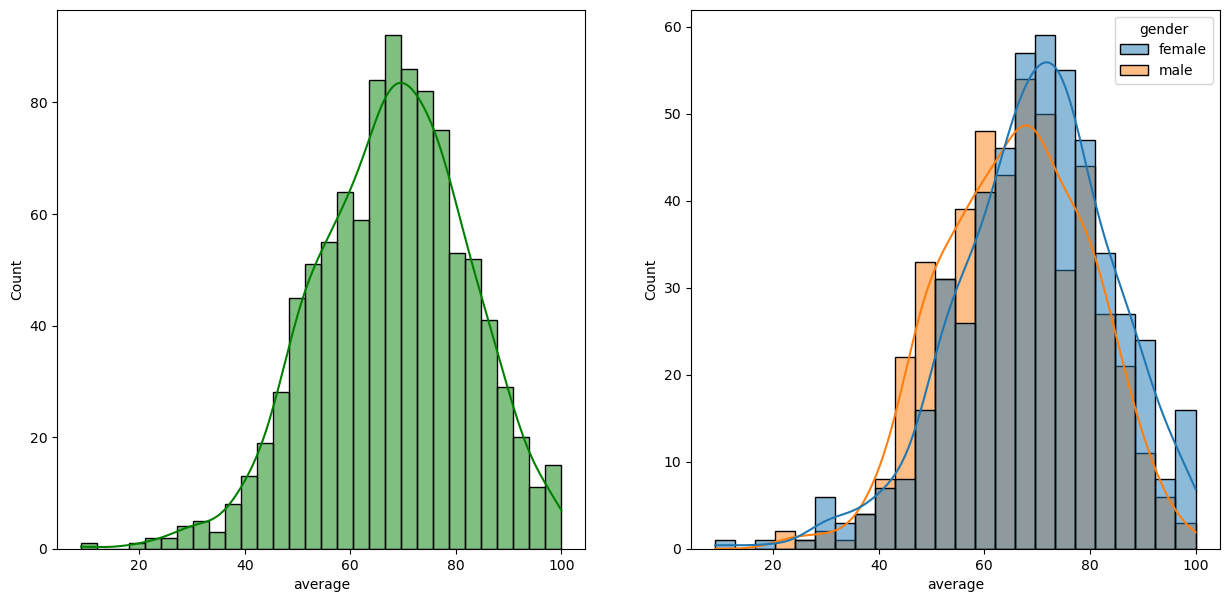

In [15]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

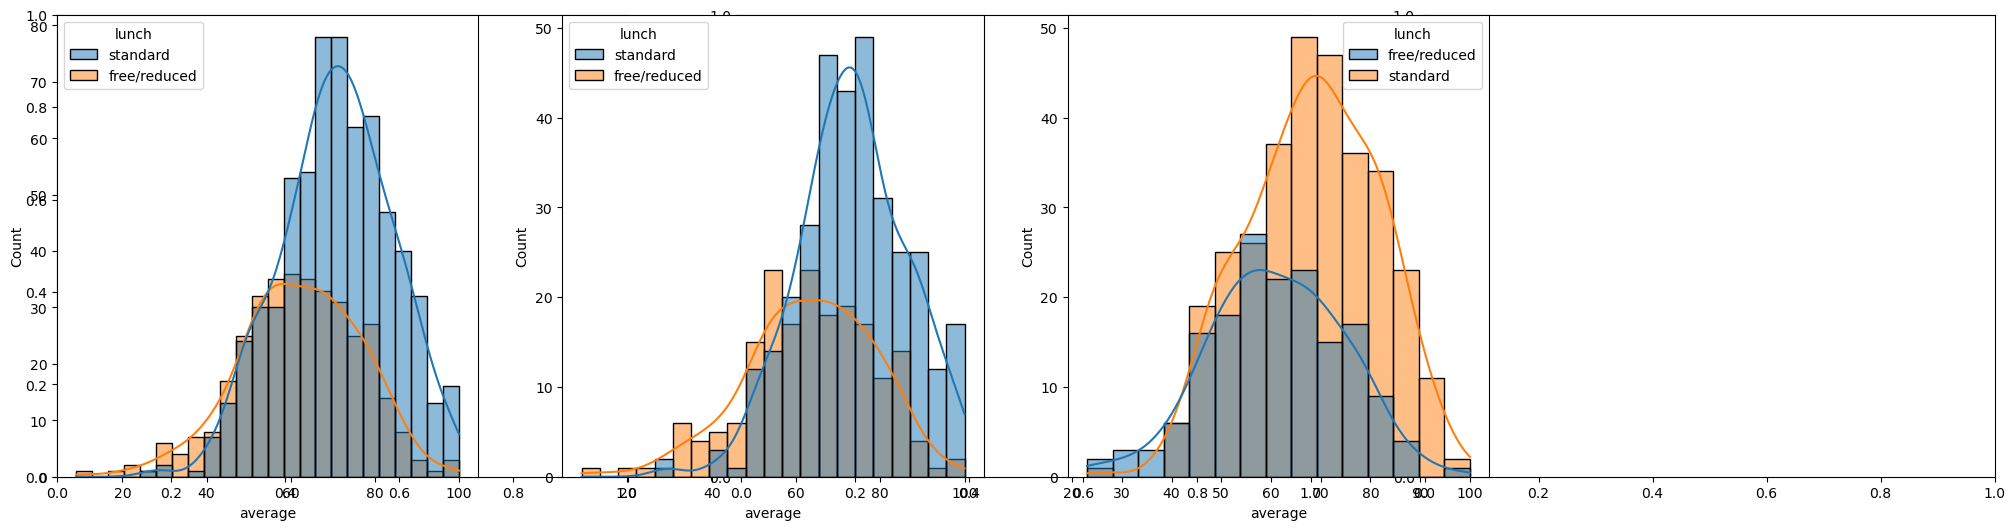

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,totalscore,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


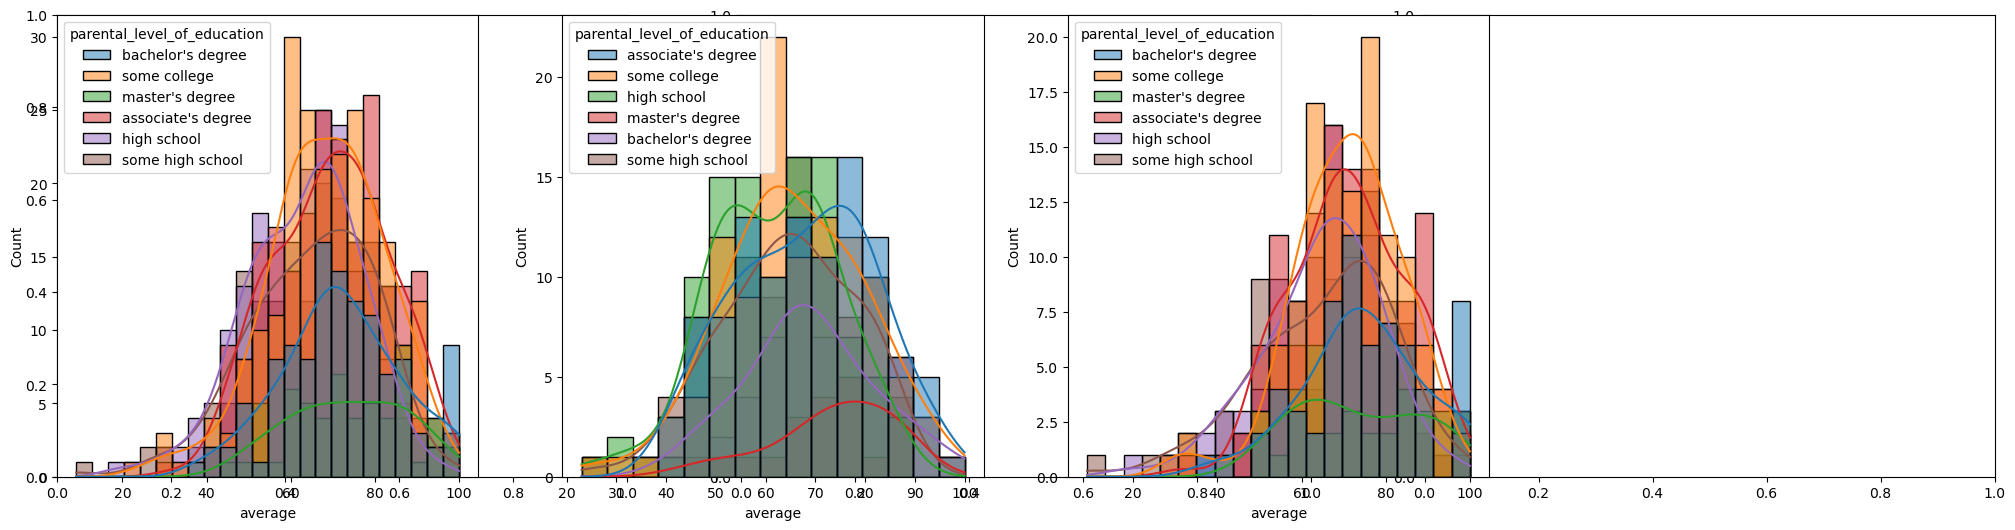

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [21]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

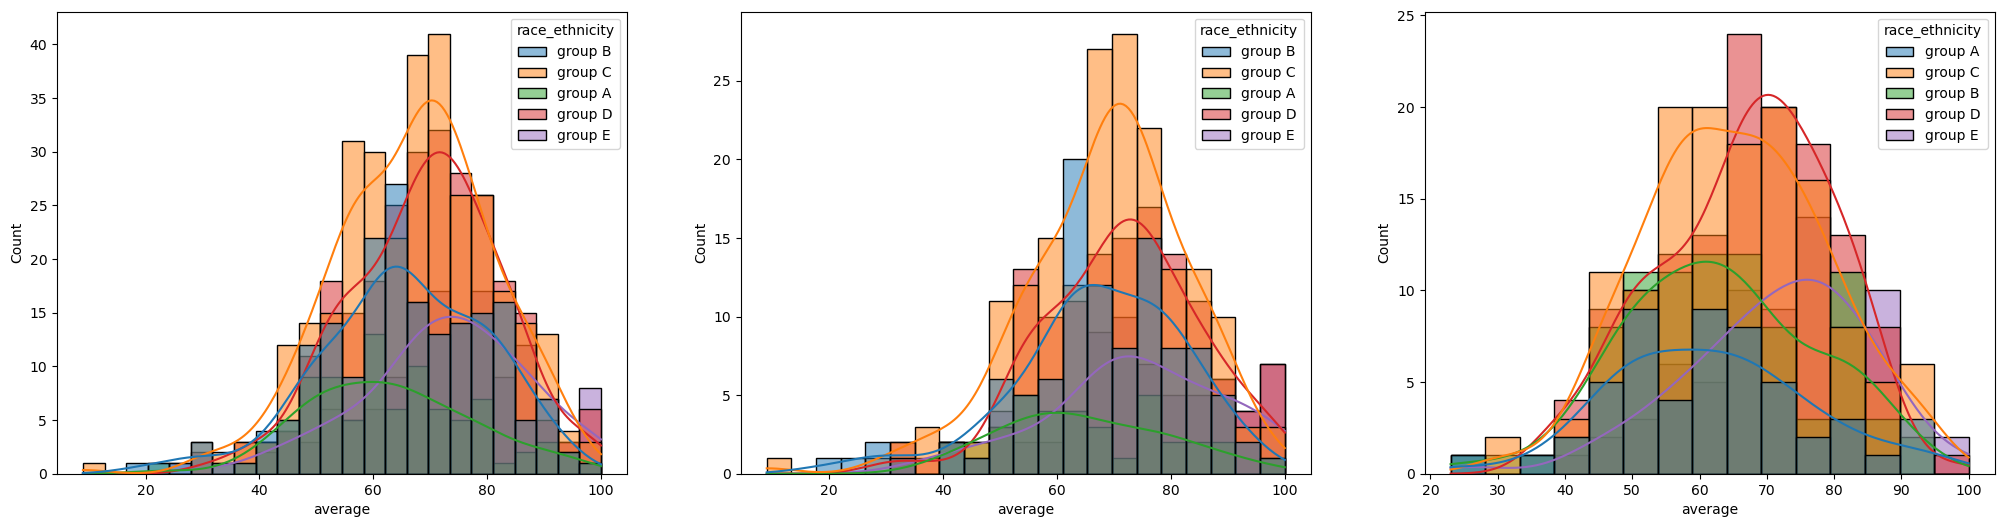

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

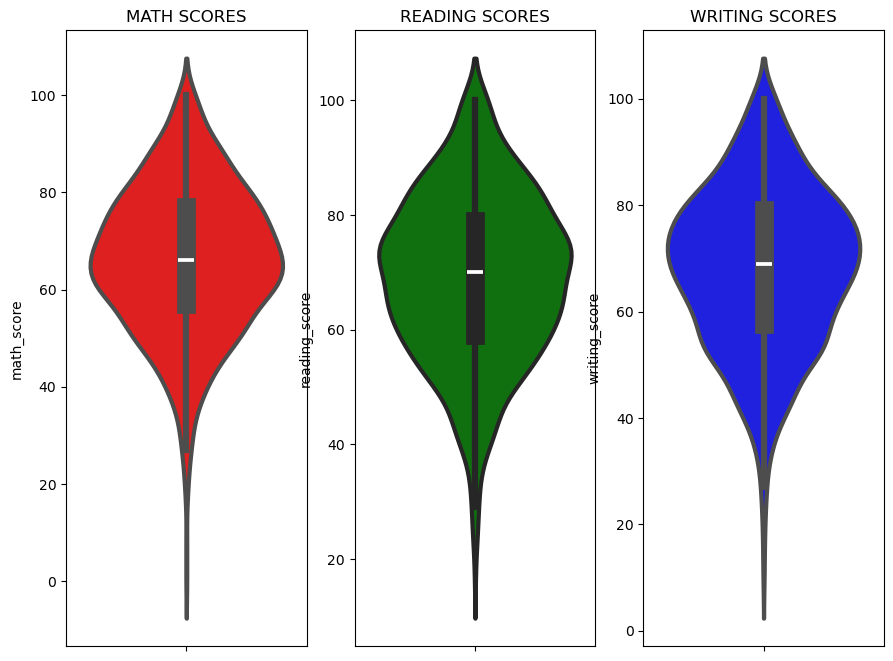

In [42]:
plt.figure(figsize=(18,8))
plt.subplot(1, 5, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 5, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 5, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

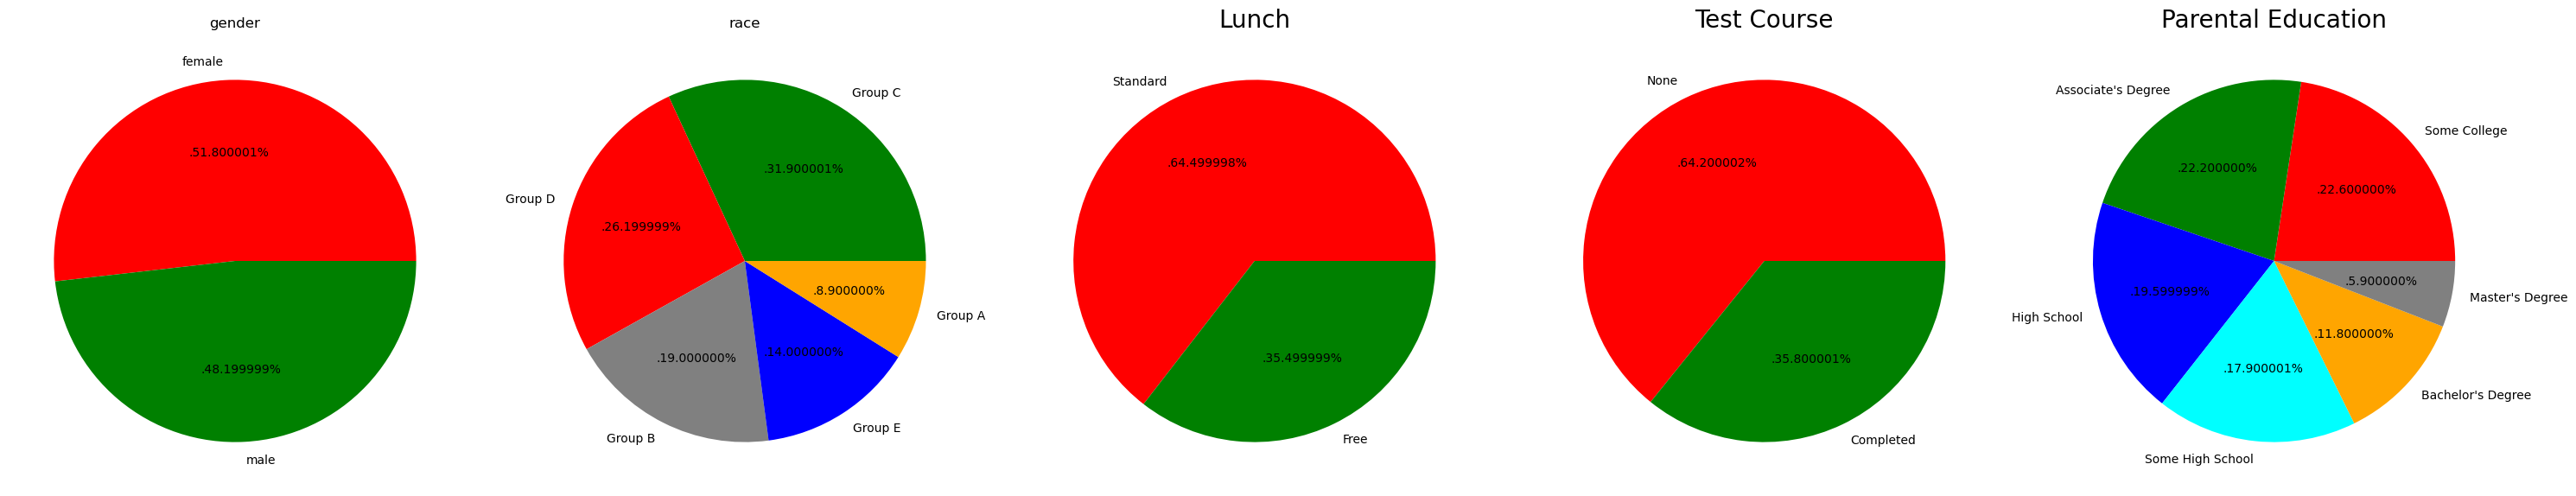

In [55]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='female','male'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("gender")
plt.axis('off')
plt.subplot(1,5,2)
plt.pie(df['race_ethnicity'].value_counts(),colors=['green','red','grey','blue','orange'],labels=['Group C', 'Group D','Group B','Group E','Group A'],autopct='.%2f%%')
plt.title('race')
plt.axis('off')
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

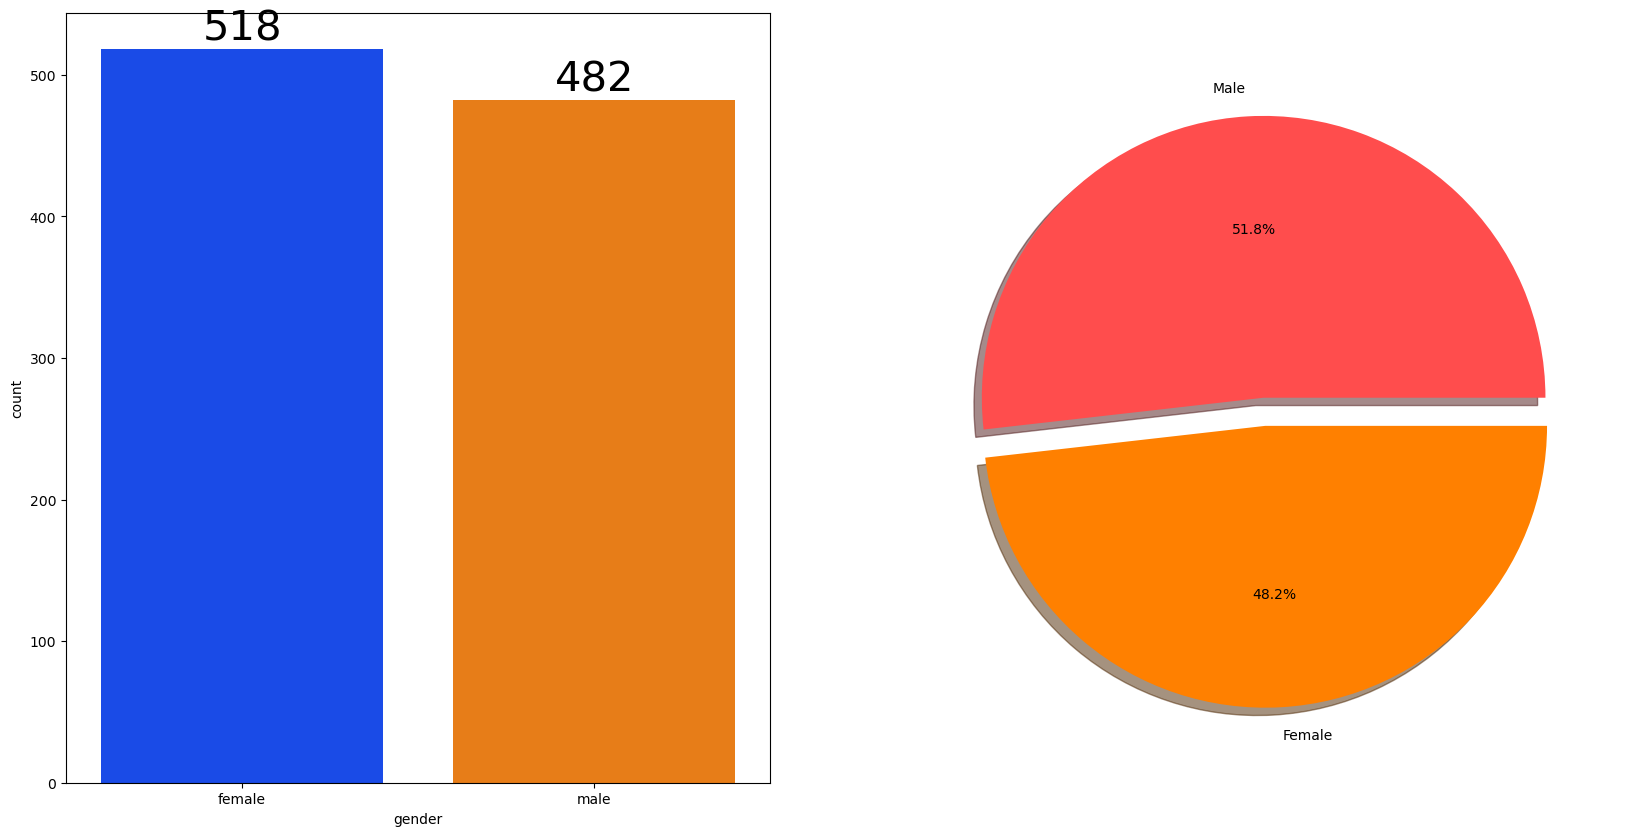

In [66]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.81)
for e in ax[0].containers:
    ax[0].bar_label(e,color='black',size=30)

    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


In [98]:
gg=df.groupby('gender')
mg=gg['math_score'].mean()
mg
ag=gg['average'].mean()
ag

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

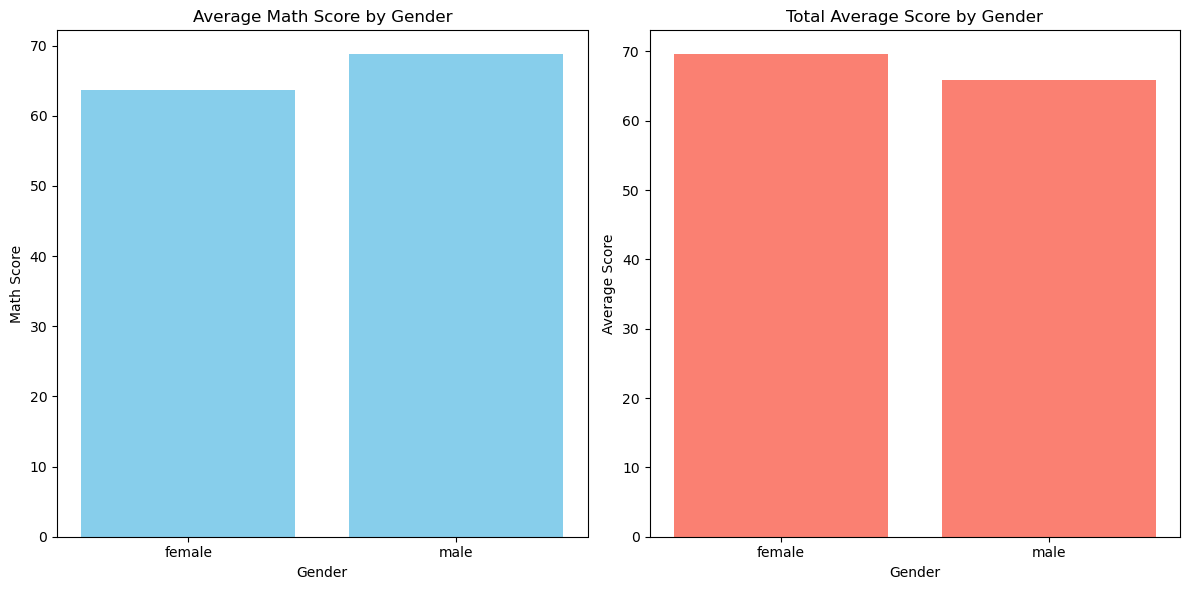

In [93]:
import matplotlib.pyplot as plt

# Assuming mg and ag are Series with gender as index
plt.figure(figsize=(12, 6))

# Plot Math Score Mean
plt.subplot(1, 2, 1)
plt.bar(mg.index, mg.values, color='skyblue')
plt.title('Average Math Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')

# Plot Total Average Score
plt.subplot(1, 2, 2)
plt.bar(ag.index, ag.values, color='salmon')
plt.title('Total Average Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')

plt.tight_layout()
plt.show()


([<matplotlib.patches.Wedge at 0x1a52724f0b0>,
 [Text(0.06647087934253791, 1.0979898096974443, 'male'),
  Text(-0.0664708793425383, -1.0979898096974443, 'female')])

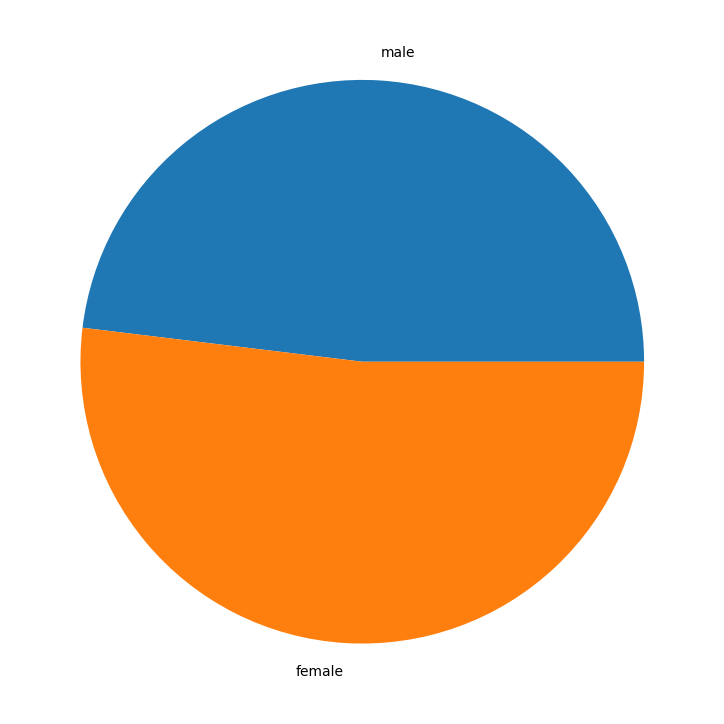

In [103]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.pie(mg.values,labels=['male','female'])

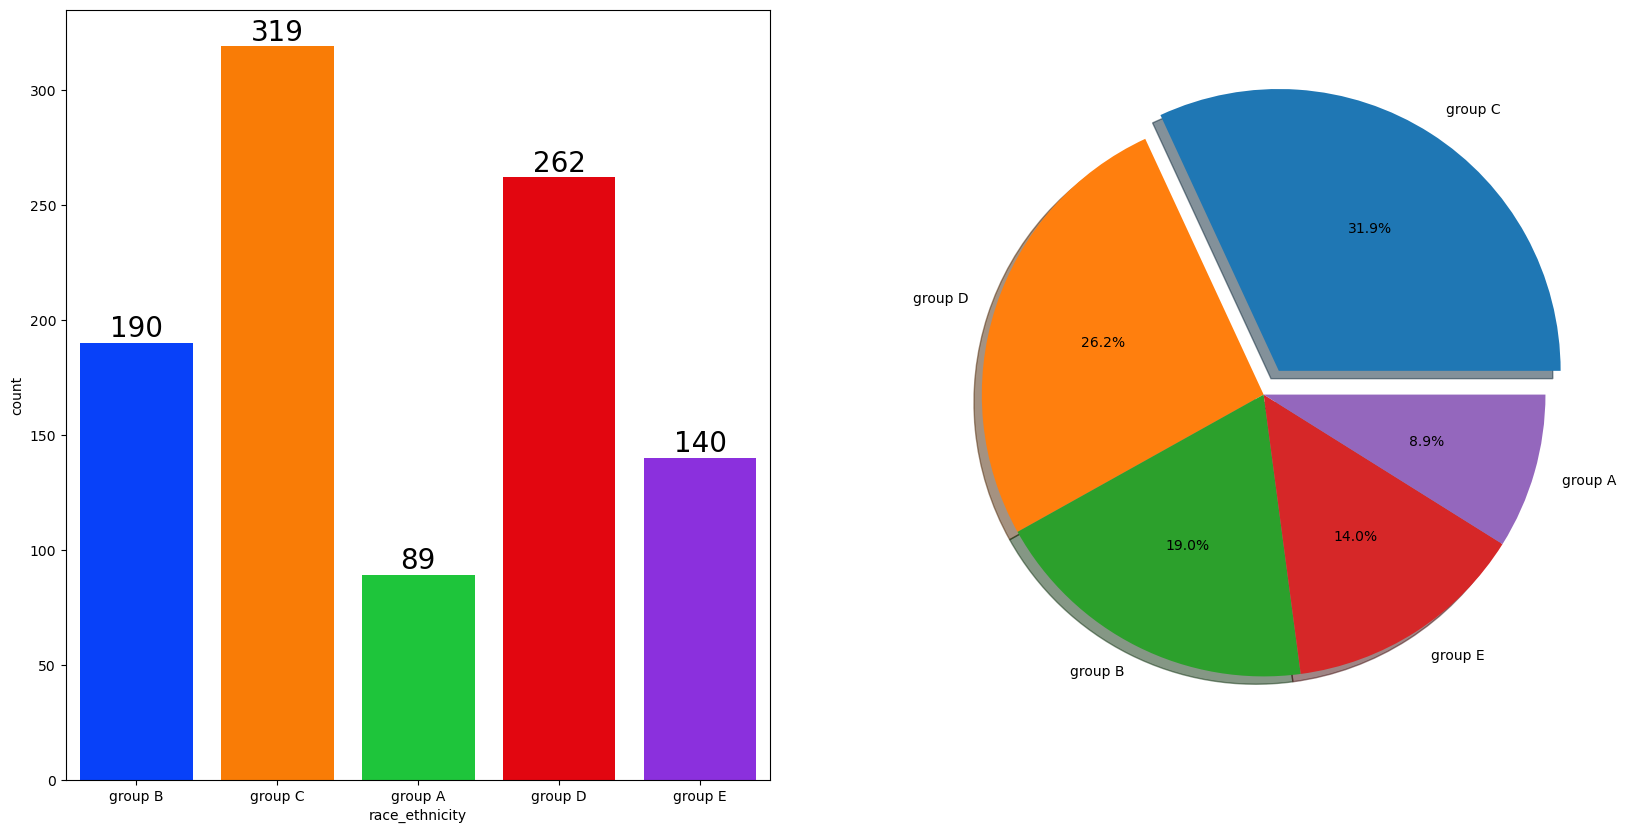

In [105]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

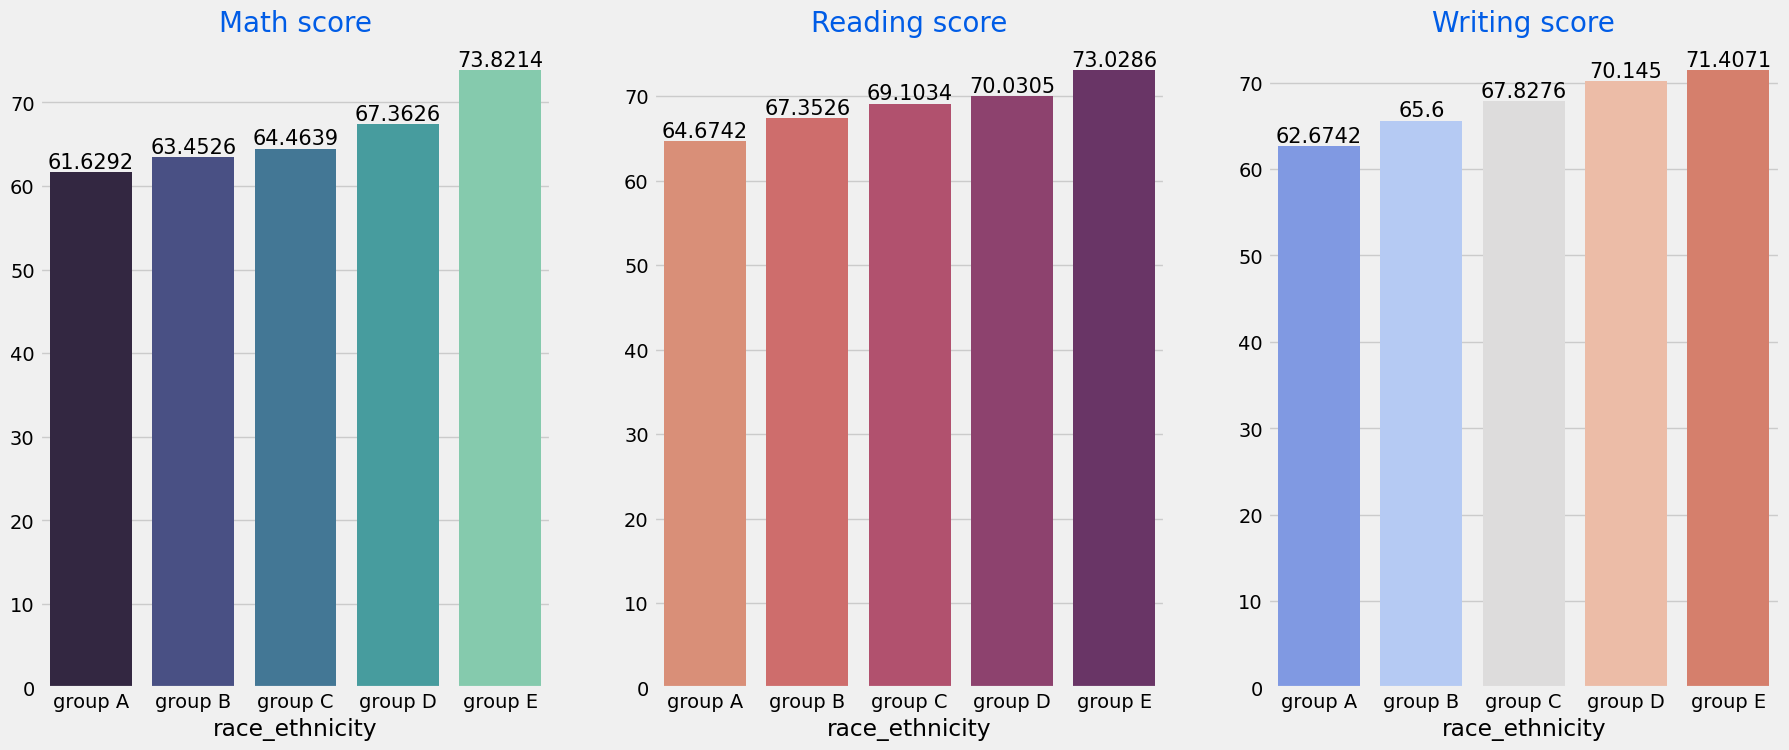

In [126]:
gd=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=gd['math_score'].mean().index,y=gd['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
sns.barplot(x=gd['reading_score'].mean().index,y=gd['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=gd['writing_score'].mean().index,y=gd['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

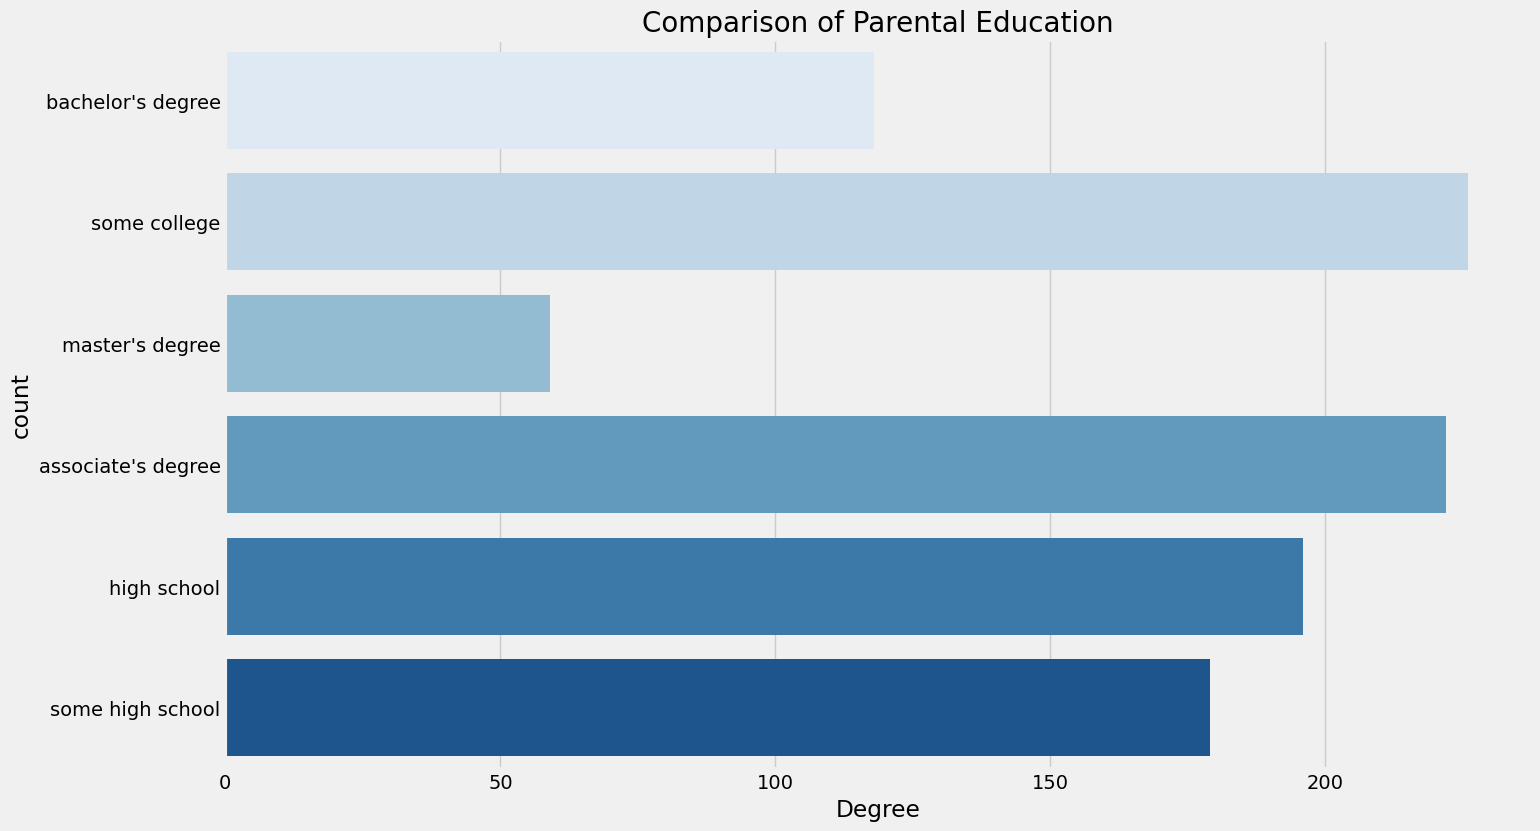

In [115]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [116]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

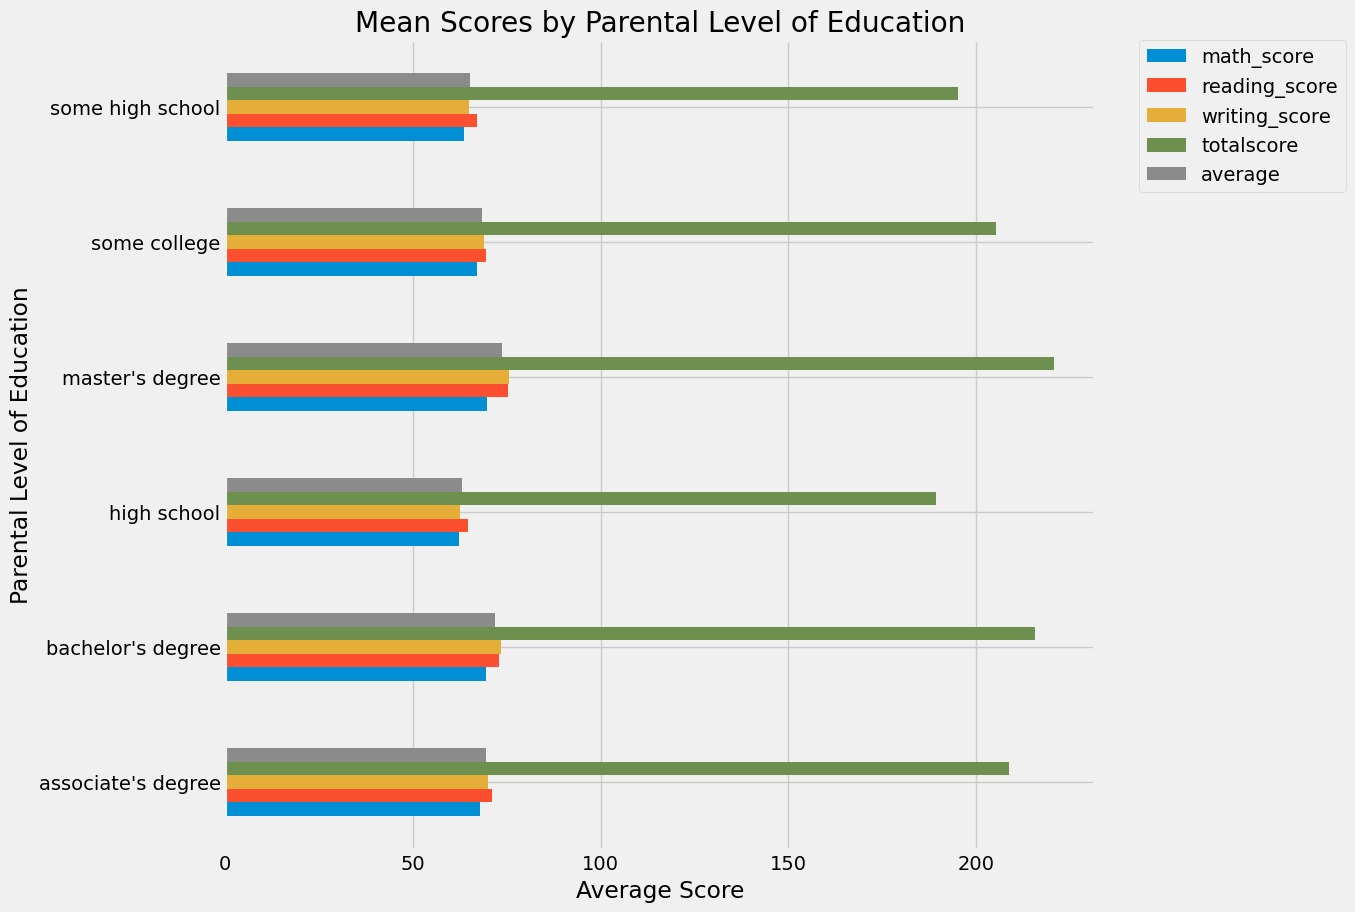

In [132]:
# df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()
# Select only numeric columns and group by parental level of education
df_numeric = df.select_dtypes(include='number')

# Group and compute mean
grouped = df.groupby('parental_level_of_education')[df_numeric.columns].mean()

# Plot
grouped.plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.title("Mean Scores by Parental Level of Education")
plt.xlabel("Average Score")
plt.ylabel("Parental Level of Education")
plt.show()


In [136]:
df_numeric = df.select_dtypes(include='number')
df_numeric

,math_score,reading_score,writing_score,totalscore,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333
...,...,...,...,...,...
995,88,99,95,282,94.000000
996,62,55,55,172,57.333333
997,59,71,65,195,65.000000
998,68,78,77,223,74.333333


<Axes: xlabel='count', ylabel='lunch'>

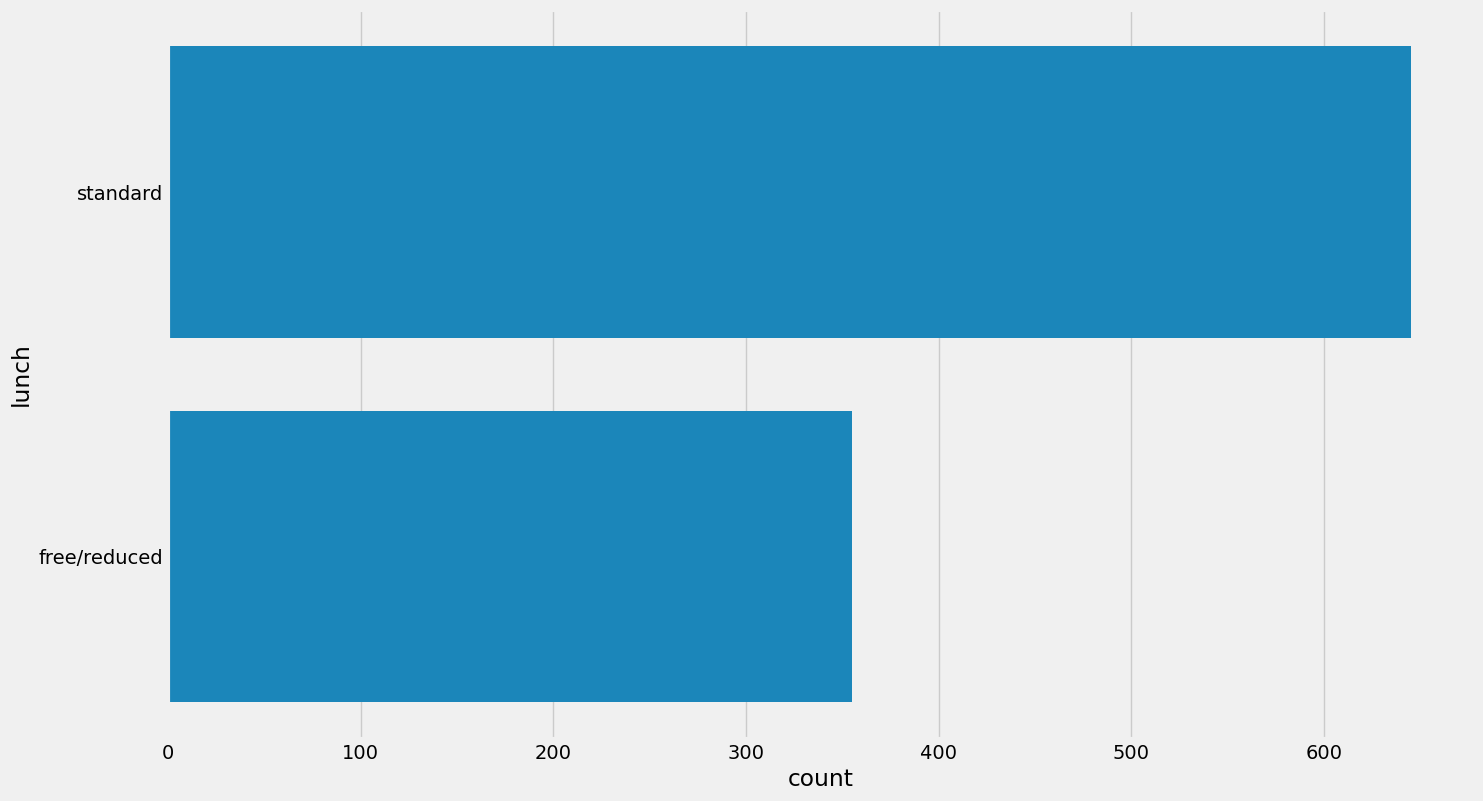

In [137]:
sns.countplot(df['lunch'])

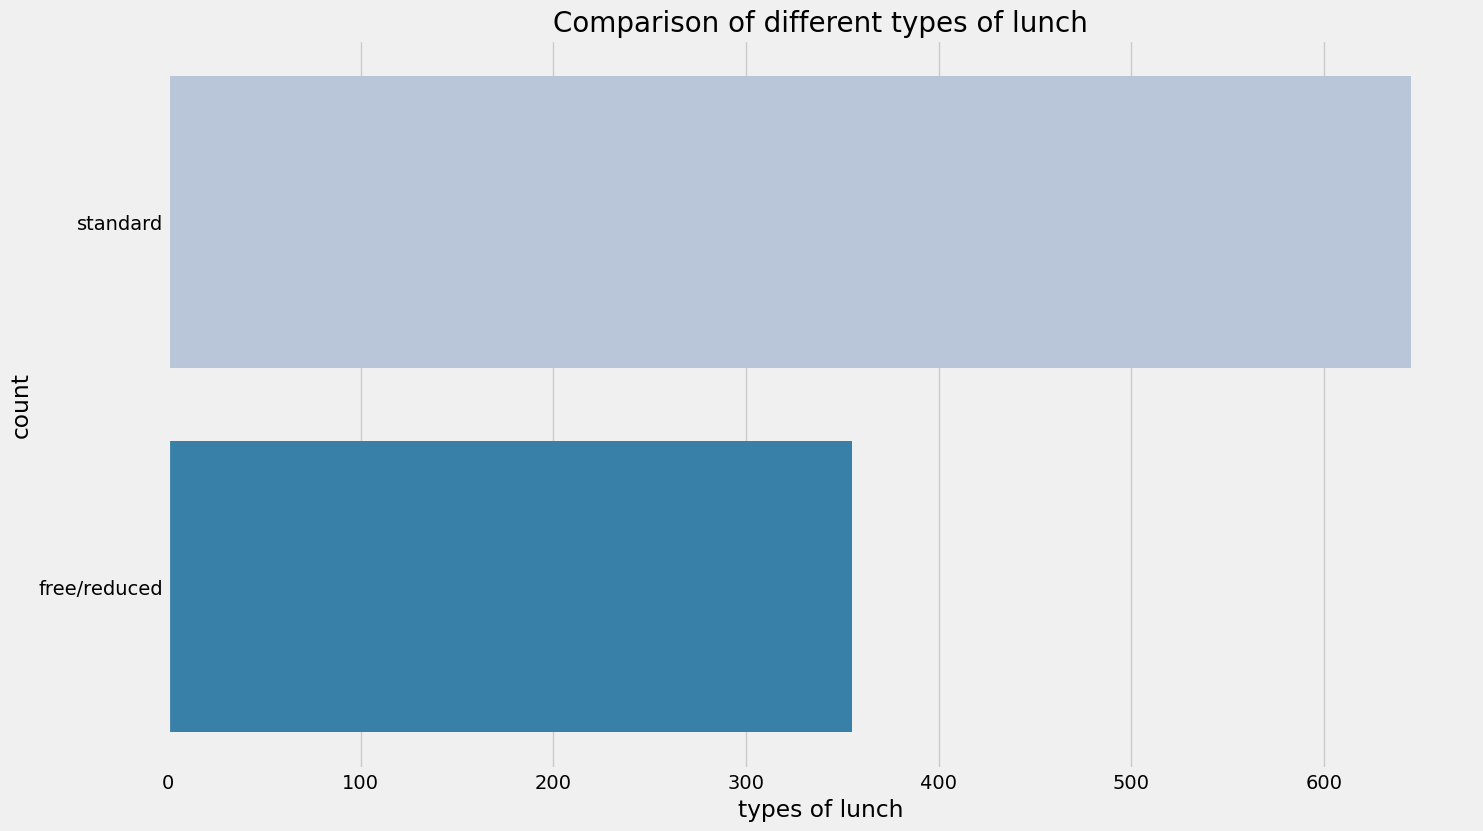

In [139]:
plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

<Axes: xlabel='test_preparation_course'>

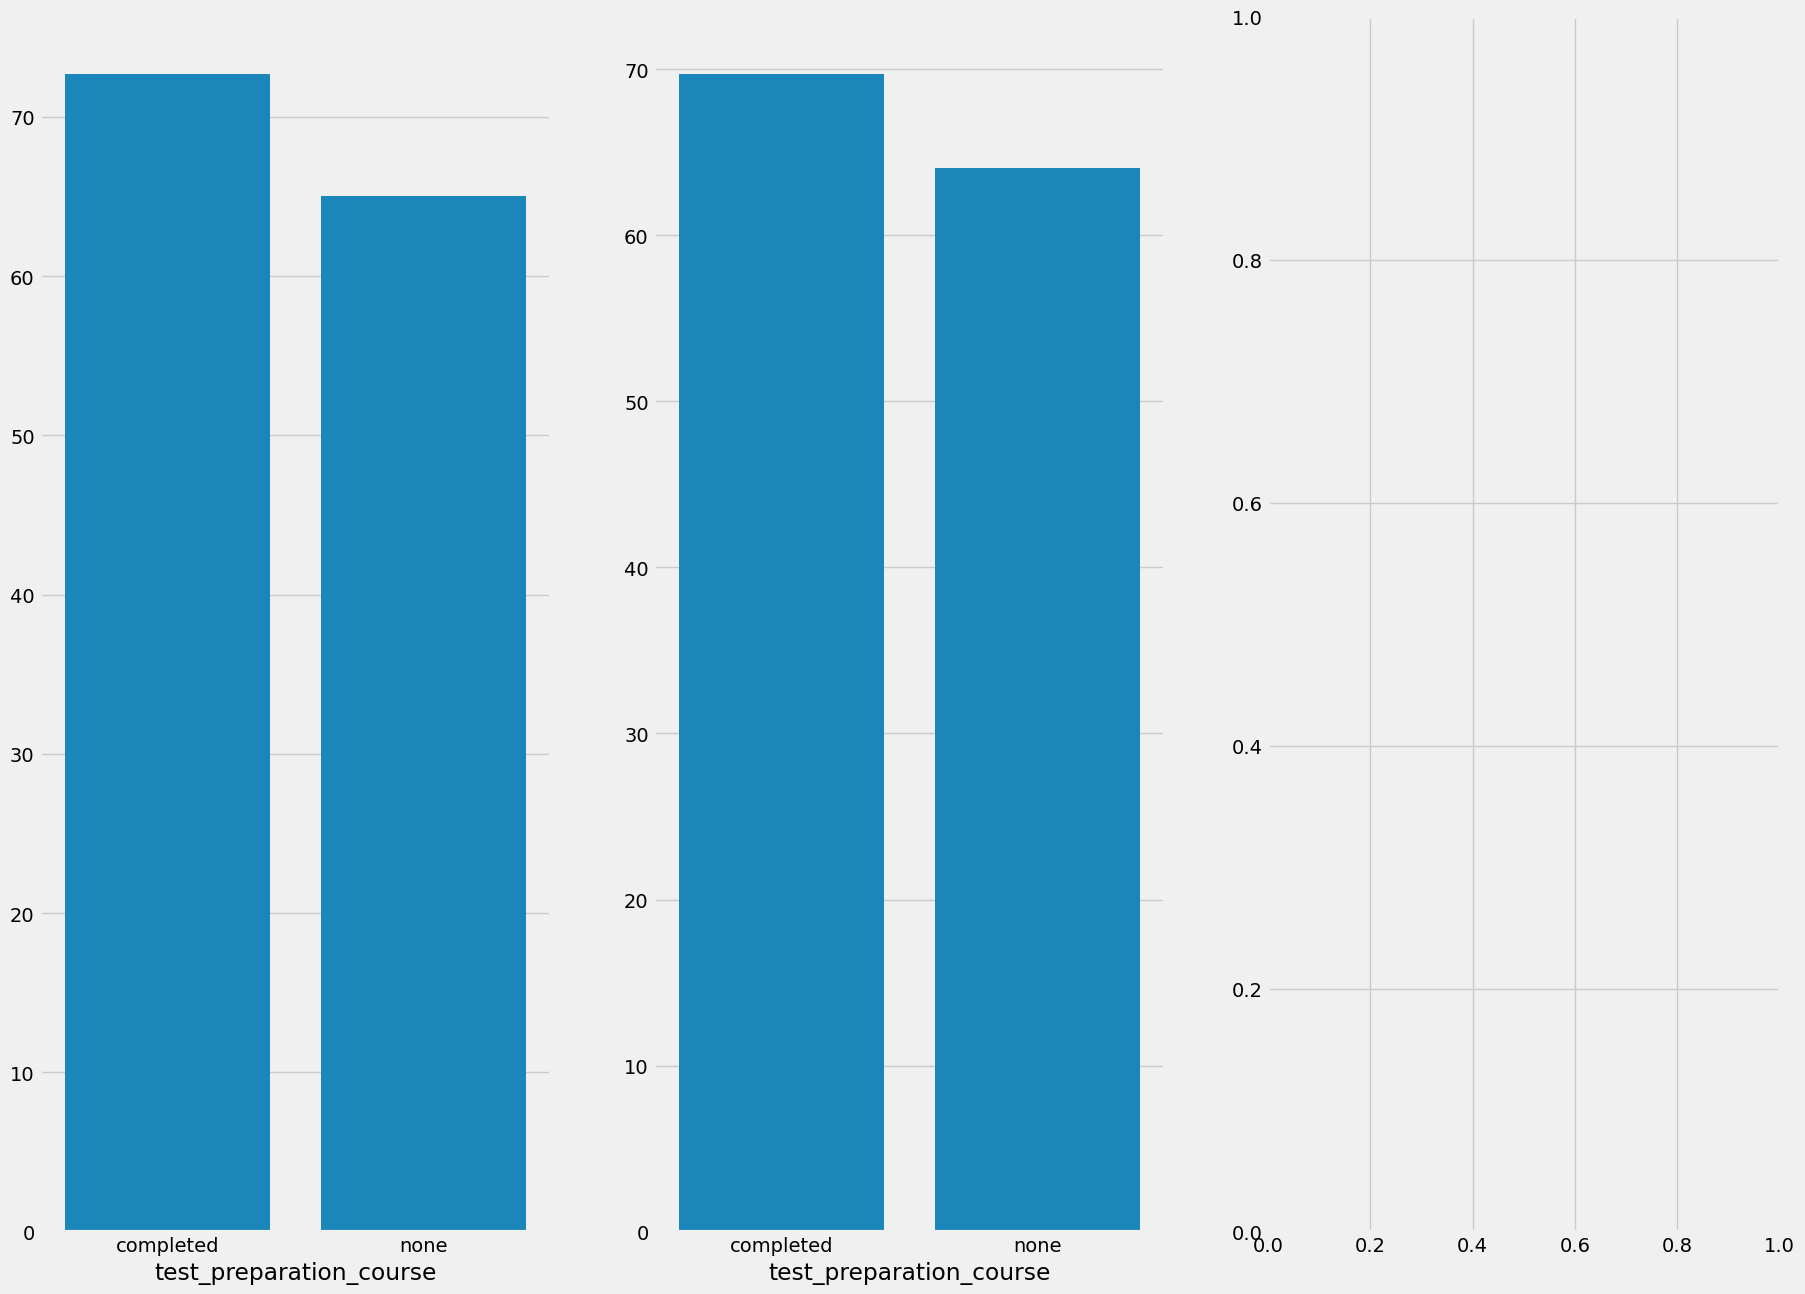

In [147]:
gd=df.groupby('test_preparation_course')
f,ax=plt.subplots(1,3,figsize=(20,15))
sns.barplot(x=gd['average'].mean().index,y=gd['average'].mean().values,ax=ax[0])
sns.barplot(x=gd['math_score'].mean().index,y=gd['math_score'].mean().values,ax=ax[1])

In [146]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

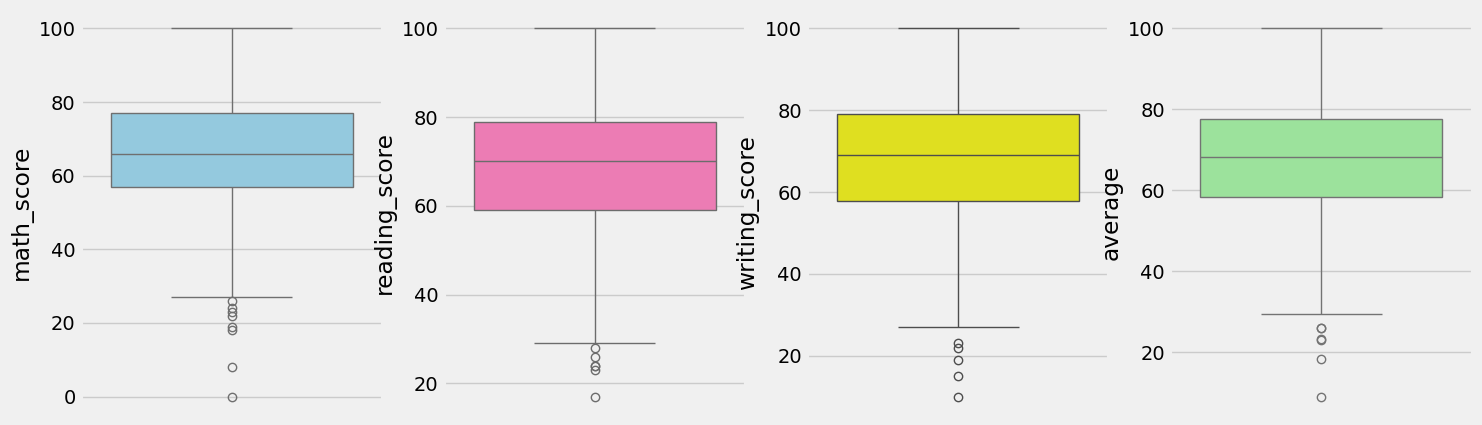

In [149]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

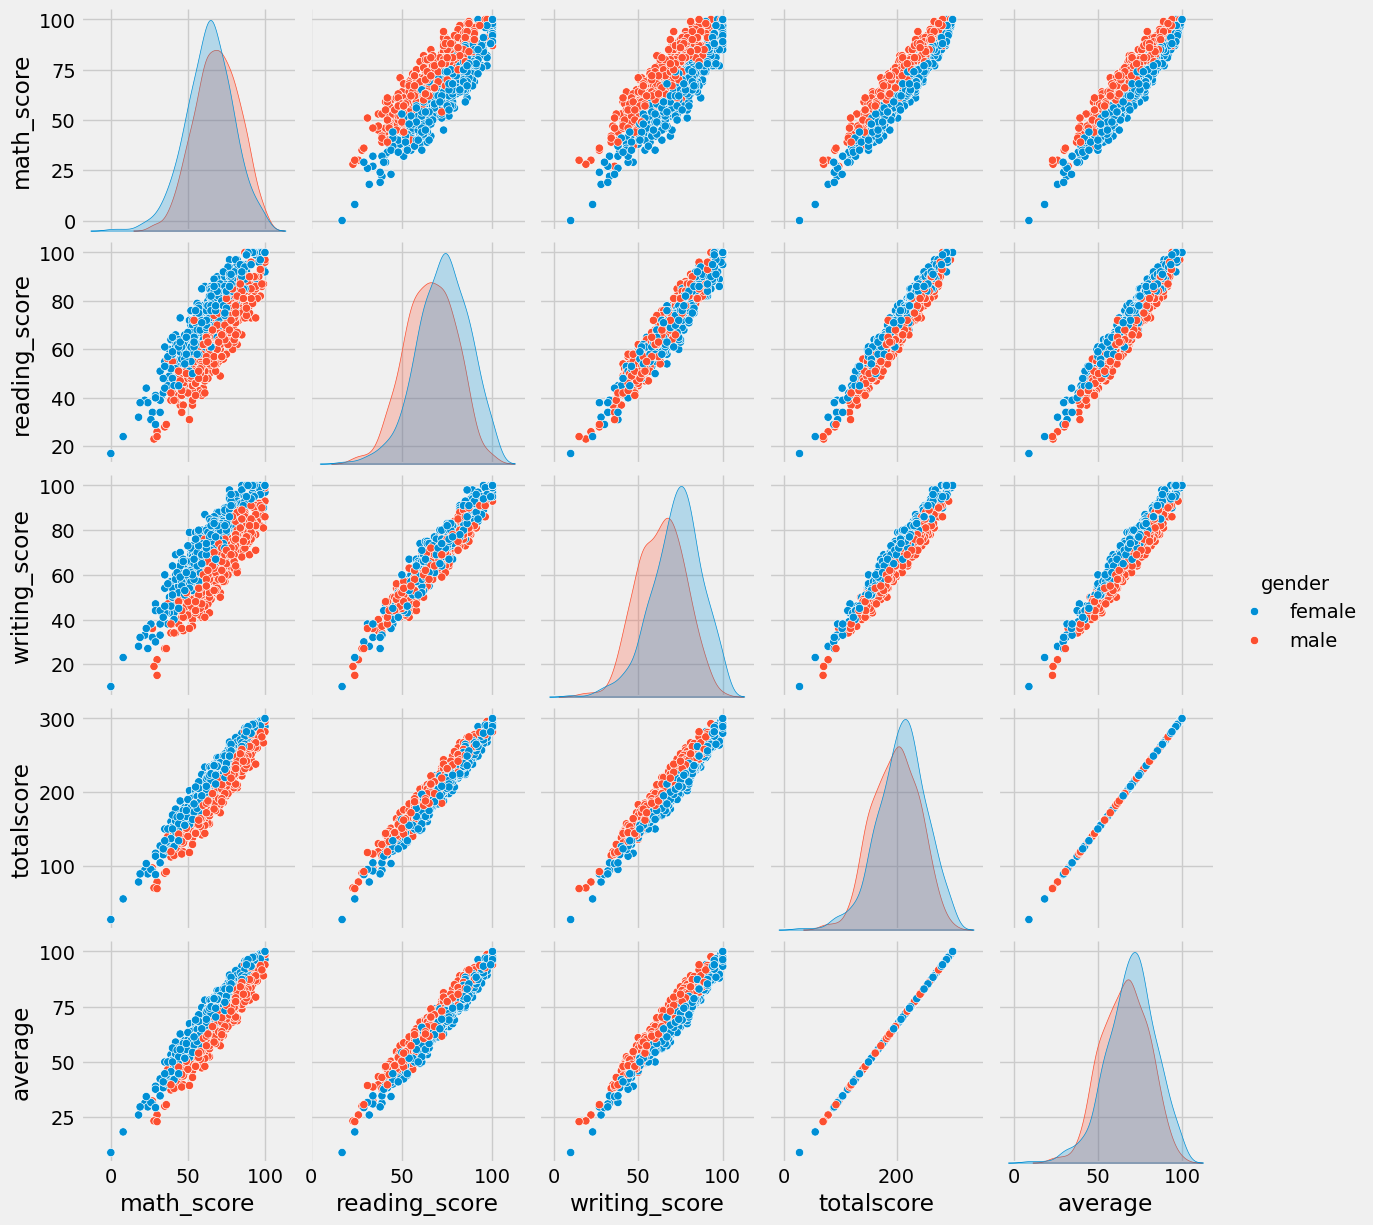

In [150]:
sns.pairplot(df,hue = 'gender')
plt.show()